<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_3_ML_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PYTHON-11. Feature Engineering

In [ ]:
import pandas as pd
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 3
 
 
#import sys
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#sys.path.clear
#sys.path.append('/content/gdrive/MyDrive/SkillFactory')

#Загрузка

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
#log = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/log.csv', names=cols)
log = pd.read_csv(log_path, names=cols)
 
#users = pd.read_csv(
#    '/content/gdrive/MyDrive/SkillFactory/vsers.csv',
#    encoding='koi8-r',
#    sep = '\t'
#)
 
users_path = 'https://raw.githubusercontent.com/akitim/datasets/main/users.csv'
users = pd.read_csv(
    users_path,
    encoding='koi8-r',
    sep = '\t'
)
users.columns = ['user_id', 'email', 'geo']
users.sample(1)
# log.sample(1)

,Юзверь,мейл,Гео
52,User_904,Kryptoburs@yahoo.com,Ярославль


Задание 1-5

In [ ]:
len(log.loc[log.loc[:, 'time'].isna(), 'time'])

15

In [ ]:
#log.dropna(axis=1)
 
#log.dropna(axis=0)
 
#log.loc[users.index.intersection(['time', 'user_id'])].dropna(axis=1)
for col in ['time', 'user_id']:
    if log.loc[:, col].isna().any():
         log.drop(col, inplace=True, axis=1)
log

,user_id,bet,win
0,Запись пользователя № - user_919,NaN,NaN
1,Запись пользователя № - user_973,NaN,NaN
2,Запись пользователя № - user_903,NaN,NaN
3,Запись пользователя № - user_954,NaN,NaN
4,Запись пользователя № - user_954,NaN,NaN
...,...,...,...
995,Запись пользователя № - user_984,9754.0,NaN
996,#error,10054.0,29265.0
997,#error,10454.0,NaN
998,#error,1000.0,NaN


In [ ]:
len(log[['time','user_id']].drop_duplicates())

986

11.3 Преобразование к datetime

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

log = log.dropna()

time = log.loc[:, 'time']
time = pd.to_datetime(
    time.apply(lambda t: t[1:] if type(t) == str else t),
    
)
time.apply(lambda t: t.minute)

14     57
29     59
151    54
189    34
205    26
       ..
967    25
971    35
972    35
976    35
991    55
Name: time, Length: 133, dtype: int64

#11.4 Извлечение признаков времени

In [ ]:
#Задание 1
 
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
 
log = pd.read_csv(log_path, names=cols)
log.dropna(inplace=True)
 
log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t),
)
log.loc[:, 'time'].dt.minute.value_counts().index[0]
# pd.DataFrame(log.loc[:, 'time'].dt.minute.value_counts())
# pd.DataFrame(log.loc[:, 'time'].dt.second).hist();
# pd.DataFrame(log.loc[:, 'time'].dt.minute).hist();
# pd.DataFrame(log.loc[:, 'time'].dt.hour).hist();
 
# Задание 2
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
 
log = pd.read_csv(log_path, names=cols)
log.dropna(inplace=True)
log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t)
)
log.loc[:, 'time'].dt.month.value_counts() #.index[0]

3    57
4    51
2    16
1     9
Name: time, dtype: int64

In [ ]:
# Задание 3*
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
log.dropna(inplace=True)

log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t),
)

weekend = log.loc[:, 'time'].dt.weekday.apply (lambda d: d in [5, 6])
len(log.loc[weekend, 'time'])

log[(log.time.dt.weekday == 5) | (log.time.dt.weekday == 6)]['time'].count()

37

# Задание 4*

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)
# log.dropna(inplace=True)

log.loc[:, 'time'] = pd.to_datetime(
    log.loc[:, 'time'].apply(lambda t: t[1:] if type(t) == str else t),
)

def timeofday(h):
    if h >= 0 and h <= 5:
        return 'night'
    elif h >=6 and h <= 11:
        return 'morning'
    elif h >= 12 and h <= 17:
        return 'day'
    else:
        return 'evening'

time = log.loc[:, 'time'].dropna()
drare = time.dt.hour.apply(timeofday).value_counts().min()
print(
time.dt.hour.apply(timeofday).value_counts() [
    time.dt.hour.apply(timeofday).value_counts() == drare
].index[0]
)

evening


#11.5 Снова смотрим на пропуски

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']

log = pd.read_csv(log_path, names=cols)

log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'bet'].value_counts()[0]

515

In [ ]:
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
 
log = pd.read_csv(log_path, names=cols)
log.loc[:, 'bet'].fillna(0, inplace=True)
 
def fillna_win(row):
    if pd.isna(row['win']) and pd.isna(row['bet']):
        row['win'] = 0
        return row
    elif row['bet'] == 0:
        row['win'] = 0
        return row
    elif pd.isna(row['win']) and not(pd.isna(row['bet'])):
        row['win'] = -row['bet']
        return row
    else:
        return row
log = log.apply(lambda row: fillna_win(row), axis=1)
(log.loc[:, 'win'] < 0).sum()
 
#11.6 Есть ли смысл играть?
#Задание 1
log.loc[:, 'net'] = -log.loc[:, 'bet']
log.loc[log.loc[:, 'win'] >= 0, 'net'] = log.loc[:,'win'] - log.loc[:, 'bet']
(log.loc[:, 'net'] > 0).sum()
 
#Задание 2
round(
    log.loc[log.loc[:, 'net'] > 0, 'net'].mean()
)   # => 80253
 
#Задание 3
round(
    log.loc[log.loc[:, 'net'] > 0, 'net'].median()
)   # => 5347 
# log.loc[log.loc[:, 'net'] < 1e7, 'net'].hist(bins=50, log=True);
# plt.xlabel('net');
# plt.title('Net distribution');

80253.33333333333

#11.7 Сколько можно выиграть/проиграть?

In [ ]:
import pandas as pd
 
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)
 
log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'win'].fillna(0, inplace=True)
 
log.loc[:, 'net'] = log.loc[:, 'win'] - log.loc[:, 'bet']
 
#log.loc[log.loc[:, 'bet'] > 0, 'bet'].count()
 
#Задание 1
round(
    (log.loc[:, 'bet'] > 0).sum() / len(log) * 100,
    #(log.loc[:, 'bet'] > 0).mean() * 100
    1
)
 
#Задание 2
log.loc[log.loc[:, 'bet'] > 0, 'bet'].mean() // 1
 
#Задание 3
log.loc[log.loc[:, 'bet'] > 0, 'net'].mean() // 1
 
#Задание 4
round(log.loc[log.loc[:, 'net'] < 0, 'net'].mean()) + 1
 
#Задание 5
#процент выигрышных ставок
winbet = ((log.loc[:, 'bet'] > 0) * (log.loc[:, 'net'] > 0)).mean() * 100
winbet < 100 - winbet

True

In [ ]:
#Задание 6*
import pandas as pd

def r2i(f):
    return round(f - 0.5)

log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)

log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'win'].fillna(0, inplace=True)

min_bet = log.loc[log.loc[:, 'bet'] > 0, 'bet'].min()
min_bet_amount = r2i(
    log.loc[log.loc[:, 'bet'] == min_bet, 'bet'].count()
)


#11.8 Повторение merge/groupby

In [ ]:
import pandas as pd
 
def r2i(f):
    return round(f - 0.5)
 
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)
 
us_path = 'https://raw.githubusercontent.com/akitim/datasets/main/users.csv'
us = pd.read_csv(
    us_path,
    encoding='koi8-r',
    sep = '\t'
)
us.columns = ['user_id', 'email', 'geo']
 
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())
 
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])
 
log.loc[:, 'bet'].fillna(0, inplace=True)
log.loc[:, 'win'].fillna(0, inplace=True)
 
log.loc[:, 'net'] = log.loc[:, 'win'] - log.loc[:, 'bet']
 
logus = pd.merge(log, us, on='user_id')
 
logus.groupby('user_id')['win'].median().median()  
 
#11.9 Анализ по пользователям
# Задание 1
r2i(logus.groupby(by='user_id')['net'].sum().median())
 
#Задание 2*
# logus.groupby(by='user_id')['bet'].sum().sort_values(ascending=True)
 
unix = logus.loc[logus.loc[:, 'bet'] > 0, 'user_id'].unique()
 
r2i(
    logus.loc[
    logus.loc[:, 'bet'] == 0,
    'user_id'
    ].apply(lambda u: u if u in unix else '').value_counts().mean()
) # => 5
 
#Задание 3**
# Сколько в среднем времени проходит
# между появлением человека в сервисе и первой ставкой?
 
logus.loc[:, 'time'] = pd.to_datetime(
    logus.loc[:, 'time'].apply(lambda t: t[1:])
)
 
def time2bet (id):
    tb = logus.loc[
        logus.loc[:, 'user_id'] == id, 'time':'bet'
    ].sort_values(by='time')
 
    t_appear = tb.loc[tb.index.min(), 'time']
    t_1stbet = tb.loc[tb.loc[tb.loc[:, 'bet'] > 0, 'time'].index.min(), 'time']
 
    return (t_1stbet - t_appear).total_seconds() / 3600 / 24
 
unix = logus.loc[logus.loc[:, 'bet'] > 0, 'user_id'].unique()
 
dt = pd.DataFrame(data=[time2bet(u) for u in unix], index = unix, columns=['time_to_1stbet'])
r2i(dt.loc[:, 'time_to_1stbet'].mean())
# time2bet('user_902')

47

#11.10 Анализ по городам

In [ ]:
# Задание 1
logus.groupby(by='geo')['win'].sum().sort_values(ascending=False).index[1]
 
# Задание 2*
 
mean_bet_by_city = logus.loc[
    logus.loc[:, 'bet'] != 0, :
].groupby(by='geo')['bet'].mean() #.sort_values(ascending=False)
 
r2i(mean_bet_by_city.max() / mean_bet_by_city.min())

127

In [ ]:
 #Задание 3
import pandas as pd
 
def r2i(f):
    return round(f - 0.5)
 
log_path = 'https://raw.githubusercontent.com/akitim/datasets/main/log.csv'
cols = ['user_id', 'time', 'bet', 'win']
log = pd.read_csv(log_path, names=cols)
 
us_path = 'https://raw.githubusercontent.com/akitim/datasets/main/users.csv'
us = pd.read_csv(
    us_path,
    encoding='koi8-r',
    sep = '\t'
)
us.columns = ['user_id', 'email', 'geo']
 
# Приведем признак user_id к одному формату в обоих датасетах  
us.user_id = us.user_id.apply(lambda x: x.lower())
 
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']
 log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])
 
logus = pd.merge(log, us, on='user_id')
 
sample2 = logus.groupby(by='geo')['user_id'].count()

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: user_id, dtype: int64

#1.5. Скалярное произведение векторов

In [ ]:
import numpy as np
 
x = np.array([4,6,1])
np.dot(x,x)**0.5

7.280109889280518

#1.7. --> Практика. Векторы

In [ ]:
import numpy as np
import pandas as pd
Hut_Paradise_DF = pd.DataFrame({'1.Rent': [65, 70, 120, 35, 40, 50, 100, 90, 85], 
                                '2.Area': [50, 52, 80, 33, 33, 44, 80, 65, 65], 
                                '3.Rooms':[3, 2, 1, 1, 1, 2, 4, 3, 2],
                                '4.Floor':[5, 12, 10, 3, 6, 13, 8, 21, 5], 
                                '5.Demo two weeks':[8, 4, 5, 10, 20, 12, 5, 1, 10], 
                                '6.Liv.Area': [37, 40, 65, 20, 16, 35, 60, 50, 40]})
#Задание 1.7.1
hp = Hut_Paradise_DF
hp.loc[4,:].values
 
#Задание 1.7.2
# print(str(hp.loc[:, '4.Floor'].values).replace(' ', ',').replace(',,', ',')[2:-1])
 
hp.shape
 
#Задание 1.7.5
nlva = hp.loc[:, '2.Area']-hp.loc[:, '6.Liv.Area']
# print(str(nlva.values).replace(' ', ',').replace(',,', ',')[1:-1])
 
#Задание 1.7.6
grr = hp.loc[:, '1.Rent'] * 4 / 10
# print(','.join(grr.astype(int).astype(str).values))

# Задание 1.7.7
hp.loc[:, '7.T.demo'] = [10, 20, 30, 15, 5, 40, 20, 8, 20]

# display(hp.head(9))
# print('\n','='*66, '\n')

np.dot(hp.loc[:, '7.T.demo'],hp.loc[:, '5.Demo two weeks'])

# Задача 2. Условие
# Даны три вектора:

u = np.array([3,0,1,1,1])
v = np.array([0,1,0,2,-2])
w = np.array([1,-4,-1,0,-2])
a = {'u': u, 'v': v, 'w': w }

from itertools import combinations

for c in combinations(['u', 'v', 'w'], 2):
    print (f'Векторы {c[0]} и {c[1]} ортогональны: \
    {np.dot(a[c[0]], a[c[1]]) == 0}')

# Задание 1.7.8
# Составьте линейную комбинацию векторов v и w с коэффициентами 2 и -3:

# print(','.join(list(map(str, 2*v - 3*w))))

# Задание 1.7.10

def norm(v):
    return v / np.dot(v, v)**0.5

round (norm(u)[2], 3)
round (norm(v)[3], 3)
round (norm(w)[0], 3)


Векторы u и v ортогональны:     True
Векторы u и w ортогональны:     True
Векторы v и w ортогональны:     True


0.213

#1.10. Практика. Базовые действия над матрицами

In [ ]:
import numpy as np

def print_arr(a):
    print(','.join(list(map(str, a))))
    return None
Husband_Income = np.array([100,220,140])
Wife_Income = np.array([150,200,130])
Mother_In_Law_Income = np.array([90,80,100])

Husband_Сonsumption = np.array([50,50,60])
Wife_Сonsumption = np.array([100,80,140])
Mother_In_Law_Сonsumption = np.array([100,20,140])

inc = np.array([Husband_Income,
               Wife_Income,
               Mother_In_Law_Income]).T
cons = np.array([Husband_Сonsumption,
                Wife_Сonsumption,
                Mother_In_Law_Сonsumption]).T

# Задание 1.10.3
# print(','.join(list(map(str, inc[0][:]*(1 - 0.13)))))

# Задание 1.10.4
# Вычислите матрицу P, которая покажет баланс семьи Ивановых за один месяц
# (то есть разницу между доходами (после вычета налога) и расходами)
P = inc*(1 - 0.13) - cons
print_arr(P[2][:])

61.8,-26.900000000000006,-53.0


#1.15. --> Практика. Умножение матриц

In [ ]:
import numpy as np

def print_arr(a):
    print(','.join(list(map(lambda f: str(round(f, 3)), a))))
    return None

A = np.array([[5,-1,3,1,2],
              [-2,8,5,-1,1]])
x = np.array([1,2,3,4,5])

# Задание 1.15.1
# print_arr(np.dot(A, x))

# Задание 1.15.2
# Найдите произведение матриц  и  в том порядке, в котором их можно умножить.
A = np.array( [ [1,9,8,5] , [3,6,3,2] , [3,3,3,3], [0,2,5,9], [4,4,1,2] ] )
B = np.array( [ [1,-1,0,1,1] , [-2,0,2,-1,1] ] )

np.dot(B, A)[0][3]

# Задача 3. Условие
x = np.array([1,2,1,0,4])
y = np.array([2,1,-1,1,0])
z = np.array([-1,1,-1,0,0])

# Задание 1.15.3
G = np.dot(np.array([x, y, z]), np.array([x, y, z]).T)
# print_arr(G.flatten())

# Задача 4. Условие
import pandas as pd
serv = pd.DataFrame({'Женские стрижки': [10, 2, 12, 4, 6, 10, 22, 7], 
                                'Мужские стрижки': [5, 21, 12, 8, 25, 3, 1, 0], 
                                'Окрашивания':[12, 3, 0, 18, 27, 2, 4, 31],
                              'Укладка':[15, 25, 30, 14, 25, 17, 25, 31],
                                'Уход':[10, 6, 4, 5, 18, 12, 20, 28]
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])
price = pd.DataFrame({'Женские стрижки': [2, 1.8, 2, 1.8, 2.5, 5, 1.1, 4.5], 
                                'Мужские стрижки': [1.5, 2.5, 2, 1.2, 3.5, 5, 1, 4], 
                                'Окрашивания':[1, 1, 0, 2.8, 2, 3, 1.5, 2.5],
                              'Укладка':[0.8, 1, 0.5, 0.8, 1, 2, 0.5, 1],
                                'Уход':[1, 1, 2, 2, 1.5, 2.5, 1.7, 2] 
                                }, 
                               index=['Аня', 'Борис', 'Вика', 'Галя', 'Дима', 'Егор', 'Женя','Юра'])

# Задание 1.15.4
# Найдите вектор выручки Бориса.
display(serv.head(1))
# display(price.head(1))
print('\n', '='*50, '\n')

# print_arr(np.array(serv.loc['Борис', :]*price.loc['Борис',:]))

# Задание 1.15.5
com = [0.2, 0.2, 0.3, 0.1, 0.1] #Вектор комиссий
# print_arr(np.dot(serv*price, com))

# Задание 1.15.6
rev = np.ones((8, 1)) - com
# print_arr(np.dot(serv*price, rev))
print_arr((serv*price*rev1).sum(axis=1).values) #вариант1

rev = np.ones((1, 5)) - com
print_arr(np.dot(serv*price, rev.T).T.flatten())  #вариант2

,Женские стрижки,Мужские стрижки,Окрашивания,Укладка,Уход
Аня,10,5,12,15,10




50.2,74.88,59.1,67.8,166.6,113.8,66.21,157.75
50.2,74.88,59.1,67.8,166.6,113.8,66.21,157.75


#1.19. Линейная (не)зависимость ч.2

In [17]:
import numpy as np
import numpy.linalg as npla

A = np.array([[1, 0, 3, 5],
              [1, 0, 4, 5],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])
npla.matrix_rank(A)

# 1.20. Практика. Обратная матрица, ранг, определитель
A = np.array([[8, 6, 11], [ 7, 5, 9], [ 6 , 10,  6]])

# Задание 1.20.1
npla.inv(A)[1][0]

v1 = np.array([9, 10, 7, 7, 9])
v2 = np.array([2, 0, 5, 1, 4])
v3 = np.array([4, 0, 0, 4, 1])
v4 = np.array([3, -4, 3, -1, -4])

# Задание 1.20.2
V = np.array([v1, v2, v3, v4])
print('Векторы v1, v2, v3, v4 линейно независимы:', npla.matrix_rank(V.T) == V.T.shape[1])

# Задание 1.20.4
G = V@V.T
G[0][3]

# Задание 1.20.5
round(npla.det(G))

# Задание 1.20.


Векторы v1, v2, v3, v4 линейно независимы: True


3716648

#2.6. Случай «Всё сложно» ч.2

In [31]:
import numpy as np
import numpy.linalg as npla

def print_arr(a):
    print(','.join(list(map(lambda f: str(round(f, 2)), a))))
    return None

# Задание 2.6.1
# Вычислите вектор ошибок для приближённого решения системы w
w = np.array([1, 1])
A = np.array([[1, -5],
             [2, 1],
             [1, 1]])
b = np.array([1,2,2])
# print_arr(b - A@w)

#Задание 2.6.3
# Найдите OLS оценку для коэффициентов w1, w2 СЛАУ
A = np.array([[1, 2],
              [-3, 1],
              [1, 2],
              [1,-1]])
b = np.array([1, 4, 5, 0])

# Задание 2.6.3_1
A.T@A

# Задание 2.6.3_3
# print_arr(A.T@b)

# Задание 2.6.3_4
w_cap = npla.inv(A.T@A)@A.T@b
# print_arr(w_cap)

w = np.array([-29.3, -0.26, 8.4])
x = np.array([1, 0.2, 6])
w@x

# Задание 2.8.2
X = np.array([[1, -1, 0],
              [1, 1, 2],
              [0, 0, 0],
              [2, 0, 2]])
npla.det(X.T@X)

# 2.9. Стандартизация признаков
# Задание 2.9.2
x = np.array([11, 8])
xc = x - x.mean()
print_arr((xc) / (xc@xc)**0.5)

0.71,-0.71


#2.11. --> Практика. Классический OLS алгоритм

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


,CGPA,TOEFL
4,8.21,103
7,7.90,101
8,8.00,102
9,8.60,108
15,8.30,105
...,...,...
487,9.14,115
489,8.50,110
491,7.81,99
498,8.43,103


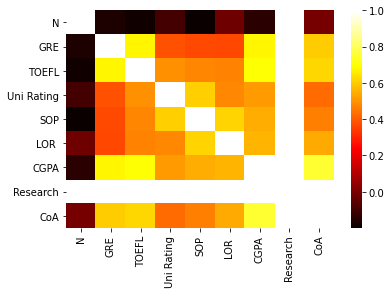

In [87]:
# Загрузка библиотек
import numpy as np # для работы с массивами
import numpy.linalg as npla
import pandas as pd # для работы DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

adm = pd.read_csv('https://raw.githubusercontent.com/akitim/datasets/main/Admission_Predict_Ver1.1.csv')
display(adm.head(1))
adm.columns = ['N', 'GRE', 'TOEFL', 'Uni Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'CoA']
# Задание 2.11.3
adm.corr().loc[:, 'CoA'].sort_values(ascending=False).index[1]

# Задание 2.11.4
# Постройте отдельно две матрицы корреляций признаков и целевой переменной: для соискателей, делавших исследования (Research=1) и для тех, у кого исследований нет (Research=0).
# В каком случае признаки сильнее скоррелированы между собой?
adm.loc[adm.loc[:, 'Research'] == 1, :].corr().apply(lambda x: abs(x)).sum().sum(), \
adm.loc[adm.loc[:, 'Research'] == 0, :].corr().apply(lambda x: abs(x)).sum().sum()

# Задание 2.11.5
sns.heatmap(adm.loc[adm.loc[:, 'Research'] == 0, :].corr(), cmap='hot');
adm.loc[adm.loc[:, 'Research'] == 0, :].corr()

# Задание 2.11.6
A = adm.loc[adm.loc[:, 'Research'] == 0, :].loc[:, ['CGPA', 'TOEFL']]
# A = A.